## Importações

In [286]:

import numpy as np

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [287]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

(554, 18)
Epoch 1/60
18/18 [==============================] - 1s 11ms/step - loss: 2.0990 - accuracy: 0.3989 - val_loss: 1.5570 - val_accuracy: 0.6513
Epoch 2/60
18/18 [==============================] - 0s 3ms/step - loss: 1.3223 - accuracy: 0.7112 - val_loss: 1.1423 - val_accuracy: 0.7899
Epoch 3/60
18/18 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.8339 - val_loss: 0.8950 - val_accuracy: 0.8697
Epoch 4/60
18/18 [==============================] - 0s 3ms/step - loss: 0.7973 - accuracy: 0.8953 - val_loss: 0.8390 - val_accuracy: 0.8824
Epoch 5/60
18/18 [==============================] - 0s 3ms/step - loss: 0.7326 - accuracy: 0.9116 - val_loss: 0.7959 - val_accuracy: 0.9118
Epoch 6/60
18/18 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.9314 - val_loss: 0.7966 - val_accuracy: 0.8824
Epoch 7/60
18/18 [==============================] - 0s 4ms/step - loss: 0.6073 - accuracy: 0.9477 - val_loss: 0.7491 - val_accuracy: 0.8908
Epoch 8/6

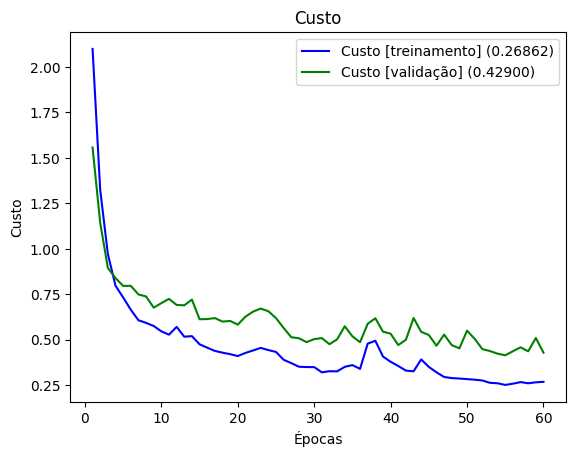

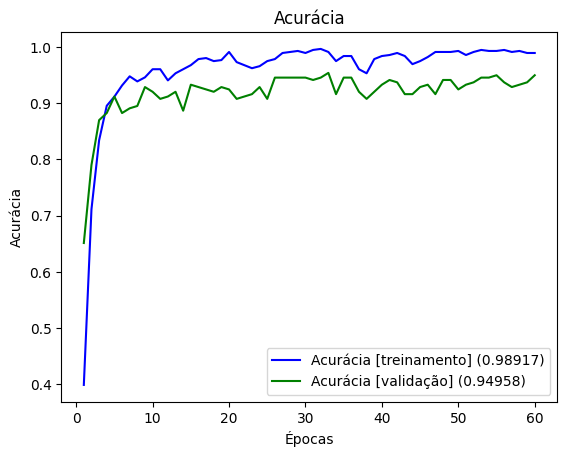

8/8 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.9496


In [288]:
# DATA/FEATURES para um voluntario
X = np.load('dataset.npy')

# LABELS
num_movements = 8 ## 8 movimentos
num_samples_per_movement = 99 ## 99 amostras por movimento
Y = [[str(i)] * num_samples_per_movement for i in range(1, num_movements + 1)]
Y = np.array(Y).flatten()

le = LabelEncoder()
Y = le.fit_transform(Y)

categorical_labels = to_categorical(Y, num_classes=len(set(Y)))

X_train, X_test, y_train, y_test = train_test_split(X, categorical_labels, test_size=0.3)

print(X_train.shape)

## desenvolvimento do modelo Keras para uma MLP
model = Sequential()

# Foi utilizado apenas o parametro l1 para retirada de picos que eram apresentados no gráfico
# OBS.: esses picos geram uma aleatoriedade nos dados e portanto alteram os resultados
# OBS. 2: l1 realiza alterações mais abruptas nos dados e l2, mais sutis.
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=regularizers.l1(0.001)))

# Se eu retirar o dropout ele mantém um resultado de maior acuracia
# Aplicação de um dropout
# model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))

# Aplicação de um dropout
# model.add(Dropout(0.2))

# quantidade de classes
model.add(Dense(8, activation='softmax'))

# Aplicação da regularização com Adam
opt = Adam(learning_rate=0.01)

# Função de custo baseada em dados originalmente categóricos
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=60, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

plot_history(history)

loss, accuracy = model.evaluate(X_test, y_test)